In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [30]:
## Read csv file
df = pd.read_csv('train_all_tasks.csv')

## Data pre-processing

In [31]:
# text and labels for task A
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(df['text'], df['label_sexist'], test_size=0.3, random_state=0)
X_test_a, X_dev_a, y_test_a, y_dev_a = train_test_split(X_test_a, y_test_a, test_size=0.33)

# text and labels for task B
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(df['text'], df['label_category'], test_size=0.3, random_state=0)
X_test_b, X_dev_b, y_test_b, y_dev_b = train_test_split(X_test_b, y_test_b, test_size=0.33)

X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split(df[df['label_sexist'] == 'sexist']['text'],
                                                                df[df['label_sexist'] == 'sexist']['label_category'],
                                                                test_size=0.3,
                                                                random_state=0)
X_test_b2, X_dev_b2, y_test_b2, y_dev_b2 = train_test_split(X_test_b2, y_test_b2, test_size=0.33)

In [32]:
print(Counter(y_train_a))
print(Counter(y_dev_a))
print(Counter(y_test_a))
print("")
print(Counter(y_train_b))
print(Counter(y_dev_b))
print(Counter(y_test_b))
print("")
print(Counter(y_train_b2))
print(Counter(y_dev_b2))
print(Counter(y_test_b2))

Counter({'not sexist': 7413, 'sexist': 2387})
Counter({'not sexist': 1059, 'sexist': 327})
Counter({'not sexist': 2130, 'sexist': 684})

Counter({'none': 7413, '2. derogation': 1119, '3. animosity': 808, '4. prejudiced discussions': 236, '1. threats, plans to harm and incitement': 224})
Counter({'none': 1042, '2. derogation': 166, '3. animosity': 110, '4. prejudiced discussions': 38, '1. threats, plans to harm and incitement': 30})
Counter({'none': 2147, '2. derogation': 305, '3. animosity': 247, '4. prejudiced discussions': 59, '1. threats, plans to harm and incitement': 56})

Counter({'2. derogation': 1107, '3. animosity': 812, '1. threats, plans to harm and incitement': 231, '4. prejudiced discussions': 228})
Counter({'2. derogation': 161, '3. animosity': 113, '4. prejudiced discussions': 34, '1. threats, plans to harm and incitement': 29})
Counter({'2. derogation': 322, '3. animosity': 240, '4. prejudiced discussions': 71, '1. threats, plans to harm and incitement': 50})


In [33]:
def confmatrix_display(confmatrix, model_name, task_name):
    plt.rcParams.update({'font.size': 12})
    plt.figure(dpi=1200)

    if task_name == 'taskA':
        labels = df['label_sexist'].unique() 
    elif task_name == 'taskB':
        labels = df['label_category'].sort_values().unique()
        labels[0] = '1. threats...'
    else:
        labels = df[df['label_sexist'] == 'sexist']['label_category'].sort_values().unique()
        labels[0] = '1. threats...'

    cm_display = ConfusionMatrixDisplay(confmatrix, display_labels=labels).plot()
    # cm_display = ConfusionMatrixDisplay(confmatrix).plot()
    
    if task_name != 'taskA':
        plt.xticks(rotation=45, ha='right')

In [34]:
def report(model_name, ydev, pred, task_name, zero_division=1):
    conf_matrix = confusion_matrix(ydev, pred)
    print("\n=== {0} ===\n\nClassification Report:\n{1}"
          "\nConfusion Matrix:\n{2}".format(model_name,
                                            classification_report(ydev, pred, 
                                                                  zero_division=zero_division),
                                            confusion_matrix(ydev, pred)))

    confmatrix_display(conf_matrix, model_name, task_name)

In [35]:
def naive_bayes(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "naive bayes"
  model = MultinomialNB()
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

In [36]:
def svm_train(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "SVM"
  model = SVC(kernel='linear')
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

In [37]:
def majority_class(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "majority class"
  model = DummyClassifier()
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name, zero_division=0)

In [38]:
def decision_tree_train(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "decision tree"
  model = DecisionTreeClassifier()
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

In [39]:
def logistic_regression(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "logistic regression"
  model = LogisticRegression(random_state=0)
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

In [40]:
from sklearn.ensemble import StackingClassifier

def stacking_classifier(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "stacking classifier"

  estimators = [('dt', DecisionTreeClassifier()),('svc', SVC(kernel='linear')),('nb', MultinomialNB()),('lr', LogisticRegression())]
  model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

## Running Task A (Binary) 

In [41]:
task_name = 'taskA'
le = LabelEncoder()

le.fit(y_train_a)
y_train_a = le.transform(y_train_a)


=== naive bayes ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.82      0.95      0.88      2144
      sexist       0.70      0.35      0.47       670

    accuracy                           0.81      2814
   macro avg       0.76      0.65      0.68      2814
weighted avg       0.80      0.81      0.79      2814

Confusion Matrix:
[[2044  100]
 [ 435  235]]


<Figure size 7200x4800 with 0 Axes>

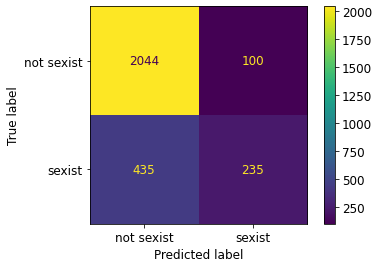

In [ ]:
naive_bayes(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)


=== majority class ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.76      1.00      0.86      2144
      sexist       0.00      0.00      0.00       670

    accuracy                           0.76      2814
   macro avg       0.38      0.50      0.43      2814
weighted avg       0.58      0.76      0.66      2814

Confusion Matrix:
[[2144    0]
 [ 670    0]]


<Figure size 7200x4800 with 0 Axes>

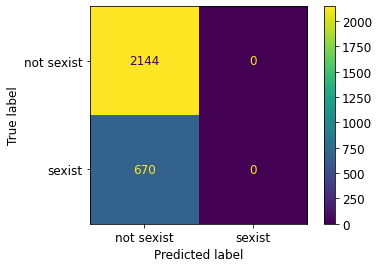

In [ ]:
majority_class(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)


=== SVM ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.86      0.90      0.88      2144
      sexist       0.62      0.54      0.58       670

    accuracy                           0.81      2814
   macro avg       0.74      0.72      0.73      2814
weighted avg       0.80      0.81      0.81      2814

Confusion Matrix:
[[1922  222]
 [ 307  363]]


<Figure size 7200x4800 with 0 Axes>

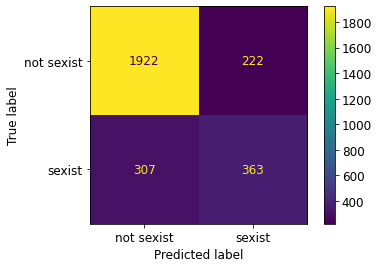

In [ ]:
svm_train(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)


=== decision tree ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.85      0.88      0.87      2144
      sexist       0.58      0.52      0.55       670

    accuracy                           0.80      2814
   macro avg       0.72      0.70      0.71      2814
weighted avg       0.79      0.80      0.79      2814

Confusion Matrix:
[[1894  250]
 [ 323  347]]


<Figure size 7200x4800 with 0 Axes>

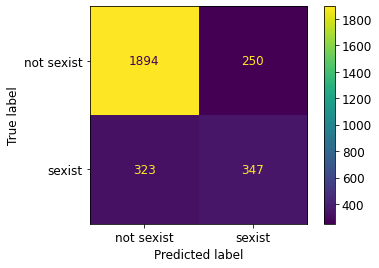

In [ ]:
decision_tree_train(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



=== logistic regression ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.86      0.94      0.90      2163
      sexist       0.71      0.50      0.59       651

    accuracy                           0.84      2814
   macro avg       0.79      0.72      0.74      2814
weighted avg       0.83      0.84      0.83      2814

Confusion Matrix:
[[2033  130]
 [ 325  326]]


<Figure size 7200x4800 with 0 Axes>

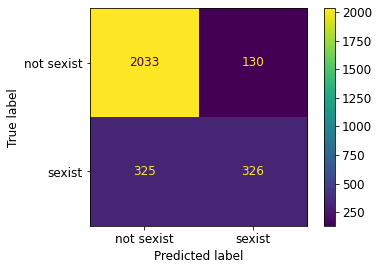

In [15]:
logistic_regression(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



=== stacking classifier ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.85      0.96      0.90      2130
      sexist       0.78      0.48      0.59       684

    accuracy                           0.84      2814
   macro avg       0.81      0.72      0.75      2814
weighted avg       0.83      0.84      0.83      2814

Confusion Matrix:
[[2035   95]
 [ 355  329]]


<Figure size 7200x4800 with 0 Axes>

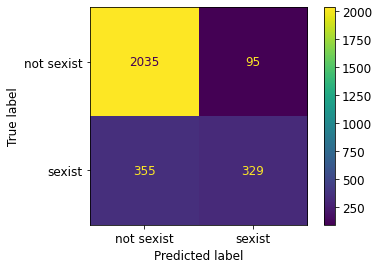

In [42]:
stacking_classifier(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)

## Running Task B (Multi-class) 

In [43]:
task_name = 'taskB'

le.fit(y_train_b)
y_train_b = le.transform(y_train_b)


=== naive bayes ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.00      0.00      0.00        59
                           2. derogation       0.48      0.11      0.18       320
                            3. animosity       0.27      0.01      0.02       233
               4. prejudiced discussions       1.00      0.00      0.00        58
                                    none       0.78      0.99      0.87      2144

                                accuracy                           0.77      2814
                               macro avg       0.51      0.22      0.21      2814
                            weighted avg       0.69      0.77      0.69      2814

Confusion Matrix:
[[   0    0    0    0   59]
 [   0   35    4    0  281]
 [   0   22    3    0  208]
 [   0    1    0    0   57]
 [   1   15    4    0 2124]]


<Figure size 7200x4800 with 0 Axes>

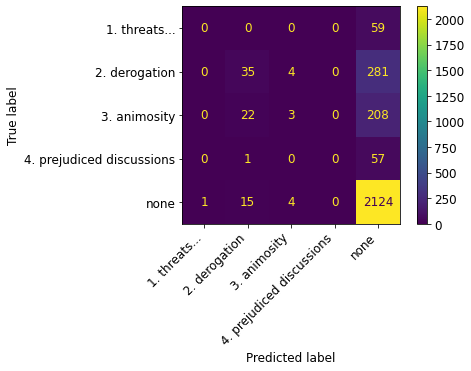

In [ ]:
naive_bayes(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)


=== majority class ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.00      0.00      0.00        59
                           2. derogation       0.00      0.00      0.00       320
                            3. animosity       0.00      0.00      0.00       233
               4. prejudiced discussions       0.00      0.00      0.00        58
                                    none       0.76      1.00      0.86      2144

                                accuracy                           0.76      2814
                               macro avg       0.15      0.20      0.17      2814
                            weighted avg       0.58      0.76      0.66      2814

Confusion Matrix:
[[   0    0    0    0   59]
 [   0    0    0    0  320]
 [   0    0    0    0  233]
 [   0    0    0    0   58]
 [   0    0    0    0 2144]]


<Figure size 7200x4800 with 0 Axes>

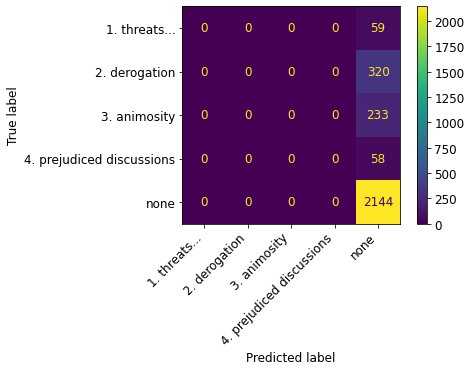

In [ ]:
majority_class(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)


=== SVM ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.15      0.14      0.14        59
                           2. derogation       0.39      0.40      0.39       320
                            3. animosity       0.37      0.29      0.32       233
               4. prejudiced discussions       0.20      0.16      0.17        58
                                    none       0.87      0.89      0.88      2144

                                accuracy                           0.75      2814
                               macro avg       0.39      0.37      0.38      2814
                            weighted avg       0.74      0.75      0.75      2814

Confusion Matrix:
[[   8    6    4    2   39]
 [  11  127   42    9  131]
 [  10   66   67    5   85]
 [   1    5    6    9   37]
 [  24  125   62   20 1913]]


<Figure size 7200x4800 with 0 Axes>

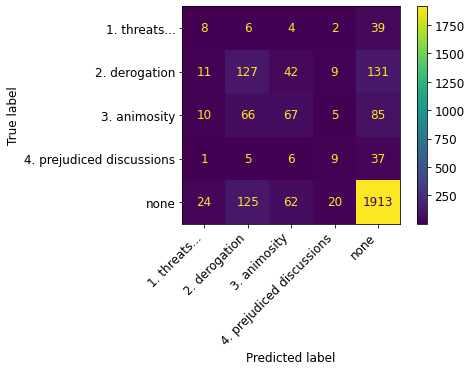

In [ ]:
svm_train(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)


=== decision tree ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.11      0.08      0.09        59
                           2. derogation       0.37      0.32      0.34       320
                            3. animosity       0.36      0.31      0.33       233
               4. prejudiced discussions       0.09      0.05      0.06        58
                                    none       0.86      0.90      0.88      2144

                                accuracy                           0.75      2814
                               macro avg       0.36      0.33      0.34      2814
                            weighted avg       0.73      0.75      0.74      2814

Confusion Matrix:
[[   5    8    7    0   39]
 [   6  103   59    6  146]
 [   2   55   72    4  100]
 [   1    9    7    3   38]
 [  33  106   53   22 1930]]


<Figure size 7200x4800 with 0 Axes>

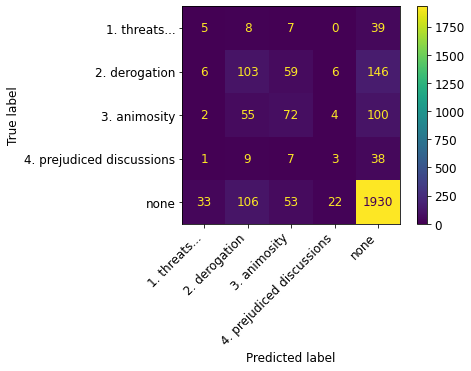

In [ ]:
decision_tree_train(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



=== logistic regression ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.30      0.10      0.15        62
                           2. derogation       0.41      0.31      0.35       295
                            3. animosity       0.43      0.26      0.32       226
               4. prejudiced discussions       0.18      0.08      0.11        61
                                    none       0.85      0.95      0.90      2170

                                accuracy                           0.79      2814
                               macro avg       0.44      0.34      0.37      2814
                            weighted avg       0.75      0.79      0.76      2814

Confusion Matrix:
[[   6    7    3    2   44]
 [   4   90   39    7  155]
 [   4   57   58    4  103]
 [   0    5    3    5   48]
 [   6   60   31   10 2063]]


<Figure size 7200x4800 with 0 Axes>

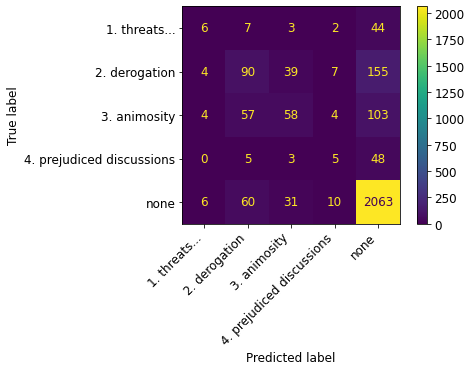

In [18]:
logistic_regression(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)

## Running Task B version 2 (Multi-class, without a none class) 

In [44]:
task_name = 'taskB2'

le.fit(y_train_b2)
y_train_b2 = le.transform(y_train_b2)


=== naive bayes ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.67      0.12      0.21        48
                           2. derogation       0.52      0.85      0.64       324
                            3. animosity       0.48      0.28      0.35       243
               4. prejudiced discussions       0.67      0.03      0.06        68

                                accuracy                           0.51       683
                               macro avg       0.58      0.32      0.32       683
                            weighted avg       0.53      0.51      0.45       683

Confusion Matrix:
[[  6  32  10   0]
 [  2 275  46   1]
 [  0 175  68   0]
 [  1  47  18   2]]


<Figure size 7200x4800 with 0 Axes>

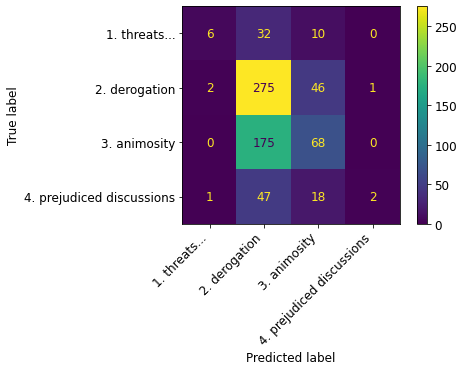

In [ ]:
naive_bayes(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)


=== majority class ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.00      0.00      0.00        48
                           2. derogation       0.47      1.00      0.64       324
                            3. animosity       0.00      0.00      0.00       243
               4. prejudiced discussions       0.00      0.00      0.00        68

                                accuracy                           0.47       683
                               macro avg       0.12      0.25      0.16       683
                            weighted avg       0.23      0.47      0.31       683

Confusion Matrix:
[[  0  48   0   0]
 [  0 324   0   0]
 [  0 243   0   0]
 [  0  68   0   0]]


<Figure size 7200x4800 with 0 Axes>

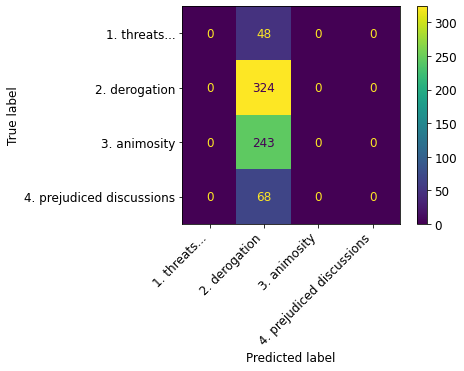

In [ ]:
majority_class(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)


=== SVM ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.38      0.62      0.48        48
                           2. derogation       0.55      0.57      0.56       324
                            3. animosity       0.45      0.41      0.43       243
               4. prejudiced discussions       0.29      0.21      0.24        68

                                accuracy                           0.48       683
                               macro avg       0.42      0.45      0.43       683
                            weighted avg       0.48      0.48      0.48       683

Confusion Matrix:
[[ 30   6   8   4]
 [ 29 186  95  14]
 [ 14 114  99  16]
 [  5  30  19  14]]


<Figure size 7200x4800 with 0 Axes>

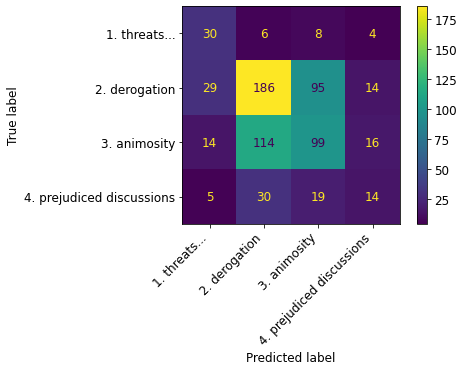

In [ ]:
svm_train(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)


=== decision tree ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.35      0.42      0.38        48
                           2. derogation       0.53      0.56      0.54       324
                            3. animosity       0.45      0.43      0.44       243
               4. prejudiced discussions       0.13      0.10      0.11        68

                                accuracy                           0.46       683
                               macro avg       0.36      0.38      0.37       683
                            weighted avg       0.45      0.46      0.45       683

Confusion Matrix:
[[ 20  16   6   6]
 [ 17 180 101  26]
 [ 15 109 104  15]
 [  5  37  19   7]]


<Figure size 7200x4800 with 0 Axes>

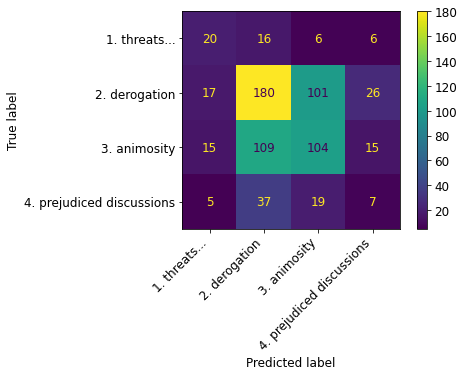

In [ ]:
decision_tree_train(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



=== logistic regression ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.54      0.55      0.55        49
                           2. derogation       0.56      0.65      0.60       323
                            3. animosity       0.43      0.42      0.43       229
               4. prejudiced discussions       0.46      0.20      0.27        82

                                accuracy                           0.51       683
                               macro avg       0.50      0.45      0.46       683
                            weighted avg       0.50      0.51      0.50       683

Confusion Matrix:
[[ 27  10   9   3]
 [ 13 211  93   6]
 [  4 119  96  10]
 [  6  37  23  16]]


<Figure size 7200x4800 with 0 Axes>

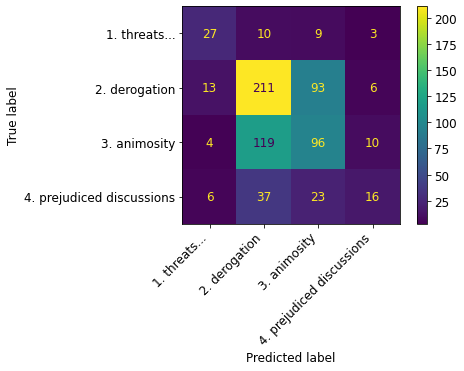

In [20]:
logistic_regression(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



=== stacking classifier ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.56      0.50      0.53        50
                           2. derogation       0.54      0.79      0.64       322
                            3. animosity       0.54      0.31      0.40       240
               4. prejudiced discussions       0.40      0.17      0.24        71

                                accuracy                           0.53       683
                               macro avg       0.51      0.44      0.45       683
                            weighted avg       0.53      0.53      0.50       683

Confusion Matrix:
[[ 25  16   5   4]
 [ 13 253  46  10]
 [  5 156  75   4]
 [  2  45  12  12]]


<Figure size 7200x4800 with 0 Axes>

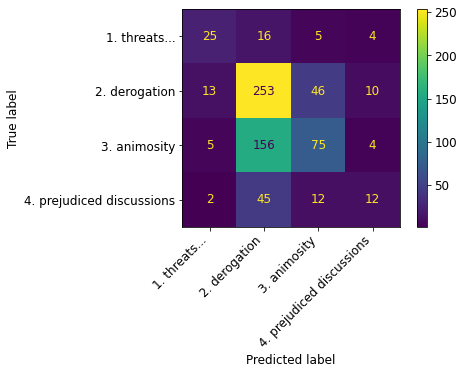

In [45]:
stacking_classifier(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)